# Capture Signal

In [ ]:
import serial

import matplotlib.pyplot as plt

import time

serial_data = serial.Serial("/dev/ttyACM1", 9600)

serial_list = []


def capture_signal():
    # time in seconds to capture the ecg signal
    capture_time = 5

    t_end = time.time() + capture_time
    while time.time() < t_end:
        while serial_data.inWaiting() == 0:
            pass
        temp_string = serial_data.readline()
        serial_string = (
            str(temp_string)
            .replace("b", "")
            .replace("'", "")
            .replace("\\r", "")
            .replace("\\n", "")
        )
        if len(serial_string) == 3:
            serial_list.append(int(serial_string))


def output_signal_to_csv():
    with open("presentation_ecg.csv", "w") as ecg_file:
        ecg_file.write("voltage,\n")
        for item in serial_list:
            ecg_file.write("%s,\n" % item)
        ecg_file.write("0,")

time.sleep(2)
capture_signal()
output_signal_to_csv()


# Filter Signal

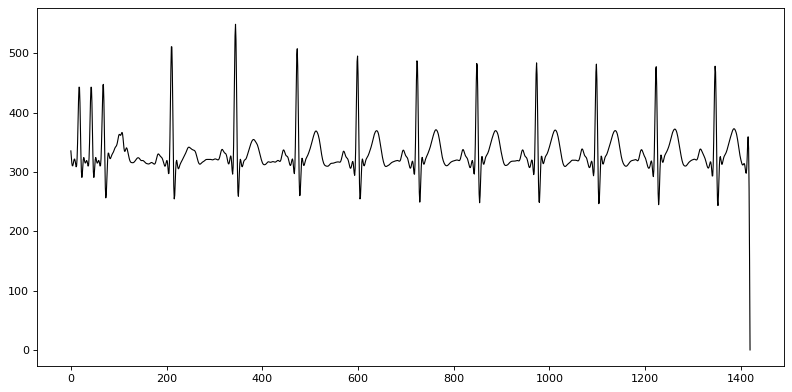

In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor="w", edgecolor="k")

b, a = signal.butter(4, 0.25, analog=False)

data = pd.read_csv("project_presentation.csv")
sig = data["voltage"]

sig_ff = signal.filtfilt(b, a, sig)

plt.plot(sig_ff, color="#000000", linewidth=1)
# plt.axis('off')

plt.savefig("project_presentation.png", dpi=150, quality=100, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Better R peak dectection

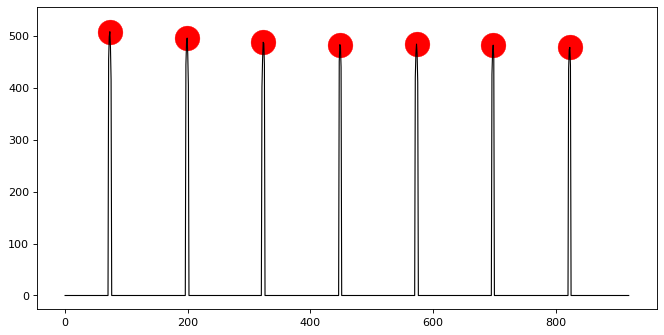

In [2]:
import numpy as np                    
import matplotlib.pyplot as plt 
from scipy.signal import argrelextrema

# voltage = data["voltage"]
threshold = 400
start = 400
end = -100
amended_sig = sig_ff[start:end]
no_of_rows = amended_sig.shape[0]
line_numbers = []
theVoltage = []


for i in range(0, no_of_rows):
    if amended_sig[i] > threshold:
        theVoltage.append(amended_sig[i])
    else:
        theVoltage.append(0)
    line_numbers.append(i)    
    

# trimming noisy signal from start and end
# theVoltage = theVoltage[start:end]
# line_numbers = line_numbers[start:end]
    
    
ecg_plot = np.concatenate((theVoltage, line_numbers))

r_peaks = argrelextrema(ecg_plot, np.greater, order=5)

# print (c_max_index)

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor="w", edgecolor="k")
plt.plot(theVoltage, color="#000000", linewidth=1)

plt.scatter(r_peaks[0],ecg_plot[r_peaks[0]],linewidth=0.3, s=500, c='r')

In [12]:
r_peaks_list

[73, 199, 323, 448, 573, 698, 823]

# Segmenting signal

In [50]:
a = np.array([1, 2, 3])

newArray = np.append (a, [10, 11, 12])

newArray


array([ 1,  2,  3, 10, 11, 12])

Combined Seg:  126


<Figure size 3000x1500 with 0 Axes>

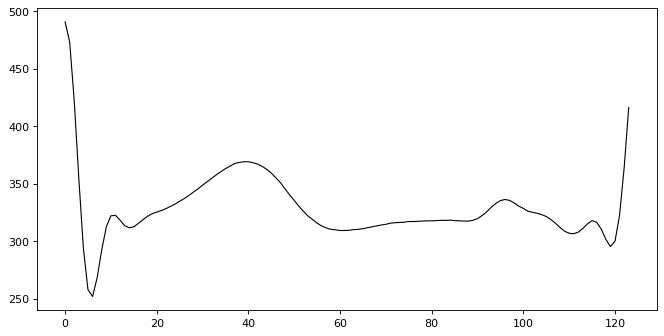

In [3]:
# r_peaks_list  = str(r_peaks)

# r_peaks_list = r_peaks_list.split() #split string into a list
# del r_peaks_list[0] # first element is a string and of no use
# r_peaks_list[-1] = (r_peaks_list[-1].replace(']),)', ',')) # last element has a string at end

# for i in range(0, len(r_peaks_list)):
#     r_peaks_list[i] = (r_peaks_list[i].replace(',',''))
#     r_peaks_list[i] = int(r_peaks_list[i])


plt.figure(num=None, figsize=(20,10), dpi=150, facecolor="w", edgecolor="k")

# ----------------------------------------------------
# --------------Combining Segments -------------------
# ----------------------------------------------------
combined_seg_does_not_exist = True

smallest_seg = None

for i in range (0, 5):
    # r_peaks is a list of all r peaks in signal captured
    segment_start = r_peaks[0][i]
    segment_end = r_peaks[0][i+1]
    
    # amended_sig is the ?
    extracted_segment = amended_sig[segment_start:segment_end]
    if smallest_seg == None:
        smallest_seg = len(extracted_segment)
#         print (smallest_seg)
    elif (len(extracted_segment) < smallest_seg):
        smallest_seg = len(extracted_segment)
#         print (smallest_seg)
    
    
    if combined_seg_does_not_exist:
        combined_seg = np.zeros(len(extracted_segment) + 100, dtype=int)
        combined_seg_does_not_exist = False
    for j in range(0,len(extracted_segment)):
        combined_seg[j] =  combined_seg[j] + extracted_segment[j]

#     plt.plot(extracted_segment, linewidth=3)




# ----------------------------------------------------
# -------------- Get mean of segments ----------------
# ----------------------------------------------------

combined_seg = np.trim_zeros(combined_seg)


print ("Combined Seg: ", len(combined_seg))

mean_segment = np.array([])

for k in range (0, smallest_seg):
#     print(k)
    mean_segment = np.append (mean_segment, combined_seg[k] / 5)
#     mean_segment.append(combined_seg[k] / 5)
    

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor="w", edgecolor="k")
# plt.axis('off')
plt.plot(mean_segment, color="#000000", linewidth=1)


# plt.plot(extracted_segment)
# plt.savefig("image_test.png", dpi=150, quality=100, bbox_inches='tight') 
# plt.savefig("combined_test.png", dpi=150, quality=100, bbox_inches='tight') 
    
#     plt.plot(extracted_segment)   
# plt.savefig("segment_test.png", dpi=150, quality=100, bbox_inches='tight')

# Standardisation 

In [ ]:
import io
from PIL import Image
import numpy as np
import sys

# This portion is part of my test code
byteImgIO = io.BytesIO()
byteImg = Image.open("image_test.png")
byteImg.save(byteImgIO, "PNG")
byteImgIO.seek(0)
byteImg = byteImgIO.read()


# Non test code
dataBytesIO = io.BytesIO(byteImg)
Image.open(dataBytesIO)

testytesttest = np.array(Image.open(byteImgIO))

# Feature Extraction

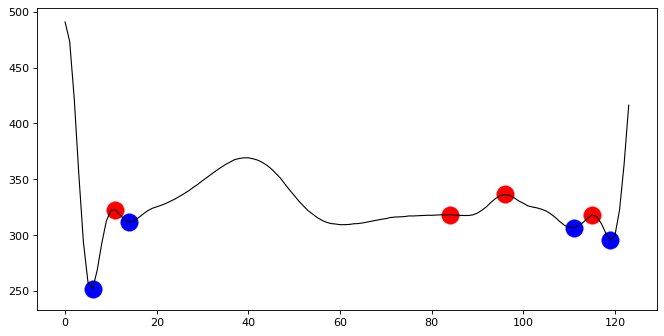

In [4]:
features_higher = argrelextrema(mean_segment, np.greater, order=5)
features_lower = argrelextrema(mean_segment, np.less, order=5)

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor="w", edgecolor="k")
# plt.axis('off')
plt.plot(mean_segment, color="#000000", linewidth=1)

features_higher = (features_higher[0],mean_segment[features_higher[0]])
features_lower = (features_lower[0],mean_segment[features_lower[0]] # removed .tolist())

plt.scatter(features_higher[0],mean_segment[features_higher[0]],linewidth=0.3, s=250, c='r')
plt.scatter(features_lower[0],mean_segment[features_lower[0]],linewidth=0.3, s=250, c='b')
# plt.savefig("features_test.png", dpi=150, quality=100, bbox_inches='tight')

In [6]:
features_x = np.concatenate((features_higher[0], features_lower[0]))
features_y = np.concatenate((features_higher[1], features_lower[1]))
features_x.sort()
features_y.sort()
# features_x
type(features_y[0])

numpy.float64

# Store Template

In [114]:
# # intialise data of lists. 
# data = {'Name':['Sam'],
#         'Features Upper X':[[10, 39, 76, 95, 115]],
#         'Features Upper Y':[[326.3017528792753, 370.410452707574, 319.6502652339276, 338.60251600172717, 318.06730395593377]],
#         'Features Lower X':[[6, 14, 60, 86, 111, 119]],
#         'Features Lower Y':[[248.45112517256922, 313.7316353899015, 309.13382888009227, 318.53207843704945, 307.23631970973344, 293.4248767851501]]
#        } 
  
# # Create DataFrame 
# df = pd.DataFrame(data) 
  
# # Print the output. 
# df.head() 

features_upper

([10, 39, 76, 95, 115],
 [326.3017528792753,
  370.410452707574,
  319.6502652339276,
  338.60251600172717,
  318.06730395593377])

In [107]:
# test = int(features_lower[1])
# type(features_lower[1][0])
test = [int(i) for i in features_lower[1]]
test

[248, 313, 309, 318, 307, 293]

# Finding R Peaks

In [ ]:
import numpy as np                    
import matplotlib.pyplot as plt 
from scipy.signal import argrelextrema

# data = pd.read_csv("project_presentation.csv")

# data = data[400:-100]


no_of_rows = data.shape[0]

# voltage = data["voltage"]
line_numbers = []

for i in range(0, no_of_rows):
    line_numbers.append(i)
    
ecg_plot = np.concatenate((sig_ff, line_numbers))

c_max_index = argrelextrema(ecg_plot, np.greater, order=45)

# print (c_max_index)

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor="w", edgecolor="k")
plt.plot(sig_ff, color="#000000", linewidth=1)


plt.scatter(c_max_index[0],ecg_plot[c_max_index[0]],linewidth=0.3, s=50, c='r')

In [ ]:
import numpy as np
import cv2 as cv
              
    
def find_peaks(peaks_list, y, x):
    for y_cors in range (y,image_y):
        for x_cors in range (x, image_x):
            if img[y_cors, x_cors] == 0:
                x = x_cors + 200
                if {y_cors, x_cors} not in peaks_list:
                    peaks_list.append({y_cors, x_cors})
                print(peaks_list)
                return x
    return x


img = cv.imread('project_presentation.png', 0)
image_x = (img.shape[1])
image_y = (img.shape[0])
x = 0
y = 0
peaks_list = []
keep_looping = True

while keep_looping:
    if x < image_x:
        x = (find_peaks(peaks_list, y, x))
    else:
        keep_looping = False

cv.imshow('image', img)
cv.waitKey(0) & 0xFF
cv.destroyAllWindows()

In [ ]:
type(voltage)

In [ ]:
voltage

In [ ]:
import csv
import time
import serial

x_value = 0
total_1 = 1000
total_2 = 1000

fieldnames = ["x_value", "total_1"]

with open('data.csv', 'w') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

while True:

    with open('data.csv', 'a') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        info = {
            "x_value": x_value,
            "total_1": total_1,
        }

        csv_writer.writerow(info)

        x_value += 1
#         total_1 = total_1 + random.randint(-6, 8)
        while serial_data.inWaiting() == 0:
            pass
        temp_string = serial_data.readline()
        serial_string = (
            str(temp_string)
            .replace("b", "")
            .replace("'", "")
            .replace("\\r", "")
            .replace("\\n", "")
        )
        if len(serial_string) == 3:
            total_1 = serial_string

In [ ]:

import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
#     y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
#     plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()